In [2]:
import os
from tensorflow.keras.applications.densenet import preprocess_input
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import pickle
import gzip

In [74]:
data, labels, data_labels = [], [], []
alphabet_dir = './characters'

In [75]:
for alpha in os.listdir(alphabet_dir):
    char_path = os.path.join(alphabet_dir, alpha)
    for alpha_im in os.listdir(char_path):
        img = image.load_img(os.path.join(char_path, alpha_im), target_size=(224, 224))
        x = image.img_to_array(img)
        #x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        x /= 255.0
        data_labels.append([x, alpha])

In [76]:
np.random.shuffle(data_labels)

In [77]:
for im, label in data_labels:
    data.append(im)
    labels.append(label)

In [78]:
len(data), len(labels)

(1560, 1560)

In [86]:
X = np.array(data)
y = np.array(labels)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


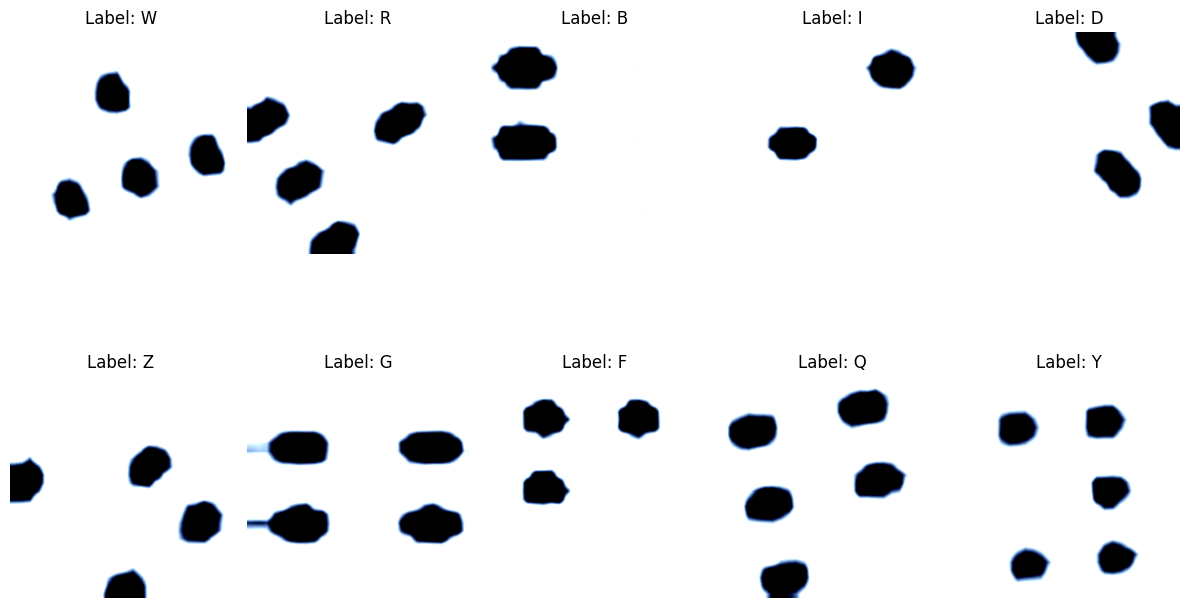

In [82]:
plt.figure(figsize=(12, 8))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(data[i] * 255.0)  # Assuming data is a list of image arrays (e.g., numpy arrays or PIL images)
    plt.title(f"Label: {labels[i]}")
    plt.axis('off')  # Turn off axis labels
plt.tight_layout()
plt.show()

In [88]:
with gzip.open('preprocessed_data.pkl.gz', 'wb') as f:
    pickle.dump({'data': X, 'labels': y}, f)